# Explore here

In [46]:
# IMPORT LIBRARIES
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


1. DATA COLLECTION

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.to_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv", index = False)

2. EXPLORE & CLEAN DATA

In [49]:
# 2.1: DIMENSIONS ➞ (rows, columns)
df.shape

(768, 9)

In [50]:
# 2.2: DATA TYPES & NON-NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No NA records

9 Numerical Characteristics

In [51]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [52]:
df.isna().sum().sort_values(ascending=False) / len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [53]:
# 2.3: FIND & DELETE DUPLICATES
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. UNIVARIATE VARIABLE 

3.1. NUMERICAL VARIABLE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

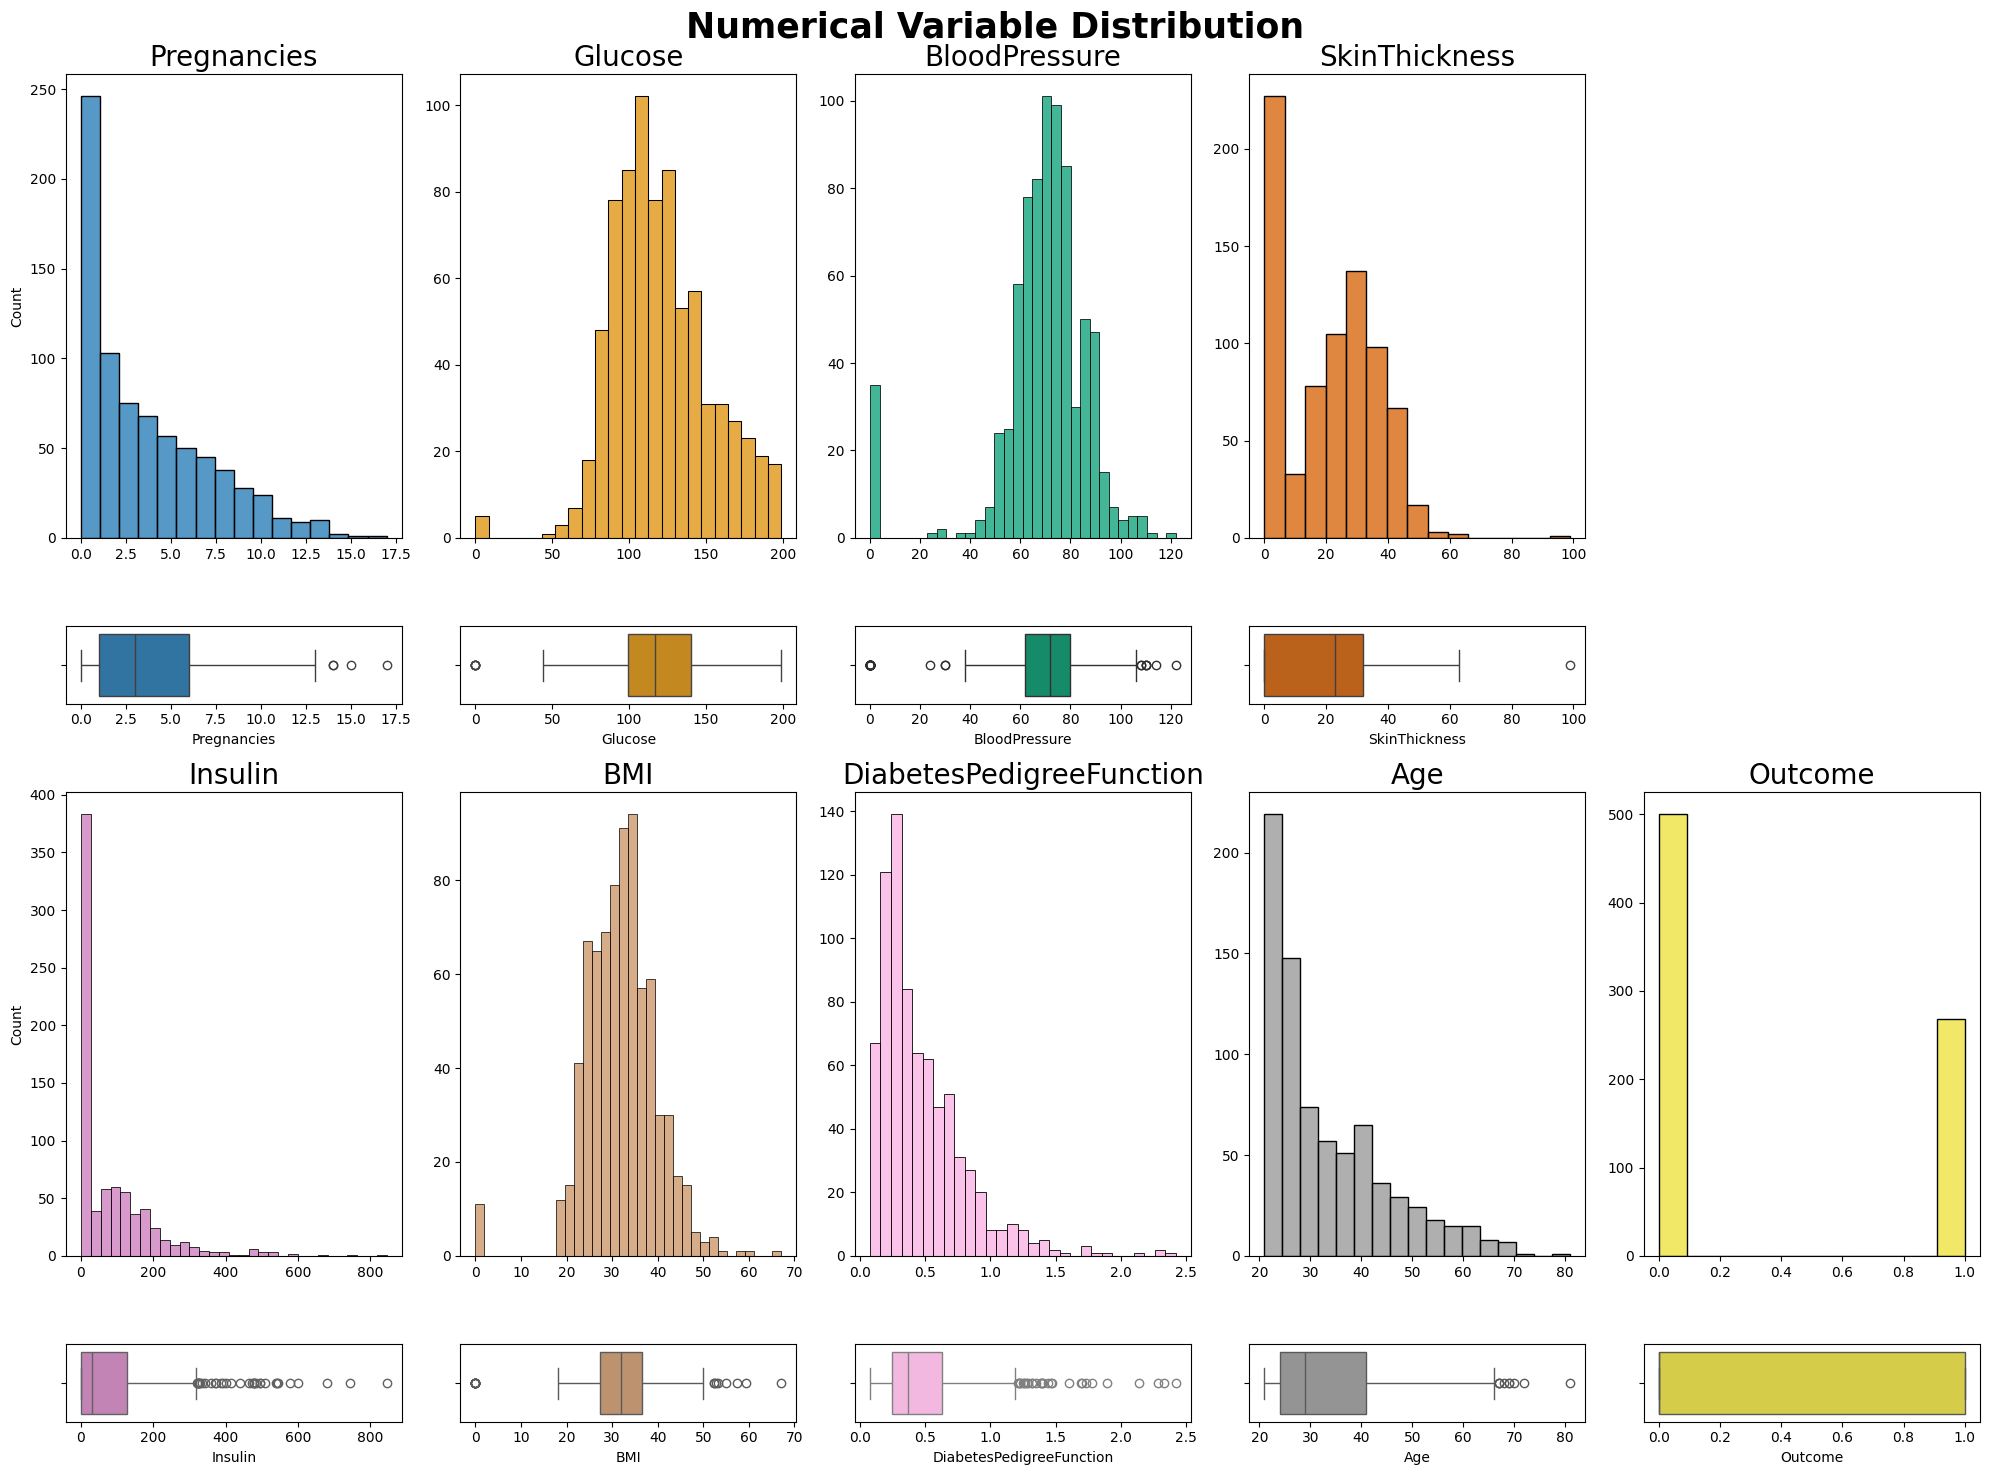

In [54]:
fig, axis = plt.subplots(4, 5, figsize = (20, 15), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Numerical Variable Distribution", fontsize=25, fontweight='bold')

sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set(xlabel = None)
axis[0, 0].set_title("Pregnancies", fontsize=20)
sns.boxplot(ax = axis[1, 0], data = df, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = df, x = "Glucose", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
axis[0, 1].set_title("Glucose", fontsize=20)
sns.boxplot(ax = axis[1, 1], data = df, x = "Glucose", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
axis[0, 2].set_title("BloodPressure", fontsize=20)
sns.boxplot(ax = axis[1, 2], data = df, x = "BloodPressure", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = df, x = "SkinThickness", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
axis[0, 3].set_title("SkinThickness", fontsize=20)
sns.boxplot(ax = axis[1, 3], data = df, x = "SkinThickness", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 0], data = df, x = "Insulin", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
axis[2, 0].set_title("Insulin", fontsize=20)
sns.boxplot(ax = axis[3, 0], data = df, x = "Insulin", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 1], data = df, x = "BMI", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
axis[2, 1].set_title("BMI", fontsize=20)
sns.boxplot(ax = axis[3, 1], data = df, x = "BMI", color=sns.color_palette("colorblind")[5])

sns.histplot(ax = axis[2, 2], data = df, x = "DiabetesPedigreeFunction", color=sns. color_palette("colorblind")[6]).set(xlabel = None, ylabel = None)
axis[2, 2].set_title("DiabetesPedigreeFunction", fontsize=20)
sns.boxplot(ax = axis[3, 2], data = df, x = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[6])

sns.histplot(ax = axis[2, 3], data = df, x = "Age", color=sns.color_palette("colorblind")[7]).set(xlabel = None, ylabel = None)
axis[2, 3].set_title("Age", fontsize=20)
sns.boxplot(ax = axis[3, 3], data = df, x = "Age", color=sns.color_palette("colorblind")[7])

sns.histplot(ax = axis[2, 4], data = df, x = "Outcome", color=sns.color_palette("colorblind")[8]). set(xlabel = None, ylabel = None)
axis[2, 4].set_title("Outcome", fontsize=20)
sns.boxplot(ax = axis[3, 4], data = df, x = "Outcome", color=sns.color_palette("colorblind")[8])

fig.delaxes(axis[0, 4])
fig.delaxes(axis[1, 4])

plt. tight_layout()
plt. show

In [55]:
df_enc = df.copy()

4. MULTIVARIATE VARIABLE ANALYSIS

4.1. NUMERICAL-NUMERICAL VARIABLE ANALYSIS

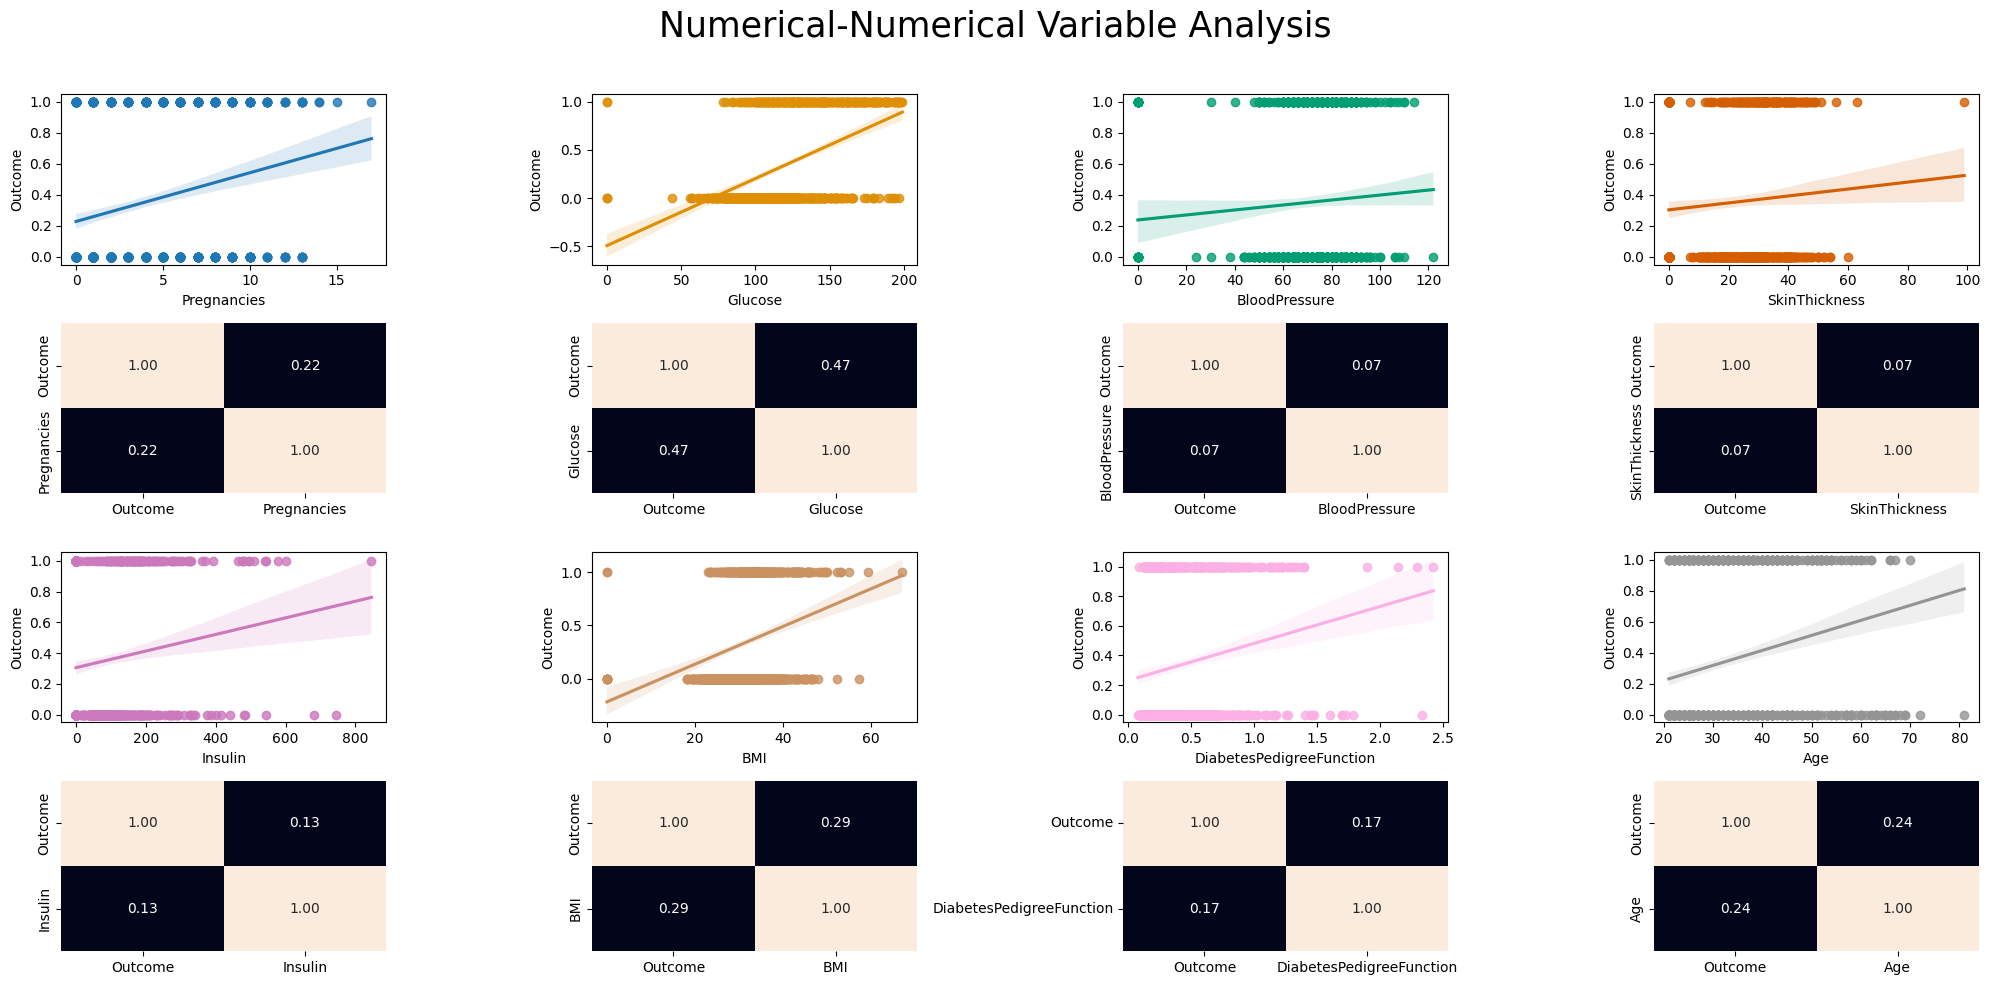

In [56]:
fig, axis = plt.subplots(4, 4, figsize = (20, 10))
fig.suptitle("Numerical-Numerical Variable Analysis", fontsize=25)

sns.regplot(ax = axis[0, 0], data = df, x = "Pregnancies", y = "Outcome")
sns.heatmap(df[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "Glucose", y = "Outcome", color=sns.color_palette("colorblind")[1])
sns.heatmap(df[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "BloodPressure", y = "Outcome", color=sns.color_palette("colorblind")[2])
sns.heatmap(df[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = df, x = "SkinThickness", y = "Outcome", color=sns.color_palette("colorblind")[3])
sns.heatmap(df[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)

sns.regplot(ax = axis[2, 0], data = df, x = "Insulin", y = "Outcome", color=sns.color_palette("colorblind")[4])
sns.heatmap(df[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "BMI", y = "Outcome", color=sns.color_palette("colorblind")[5])
sns.heatmap(df[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[2, 2], data = df, x = "DiabetesPedigreeFunction", y = "Outcome", color=sns.color_palette("colorblind")[6])
sns.heatmap(df[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)

sns.regplot(ax = axis[2, 3], data = df, x = "Age", y = "Outcome", color=sns.color_palette("colorblind")[7])
sns.heatmap(df[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3], cbar = False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

4.2 CORRELATION ANALYSIS

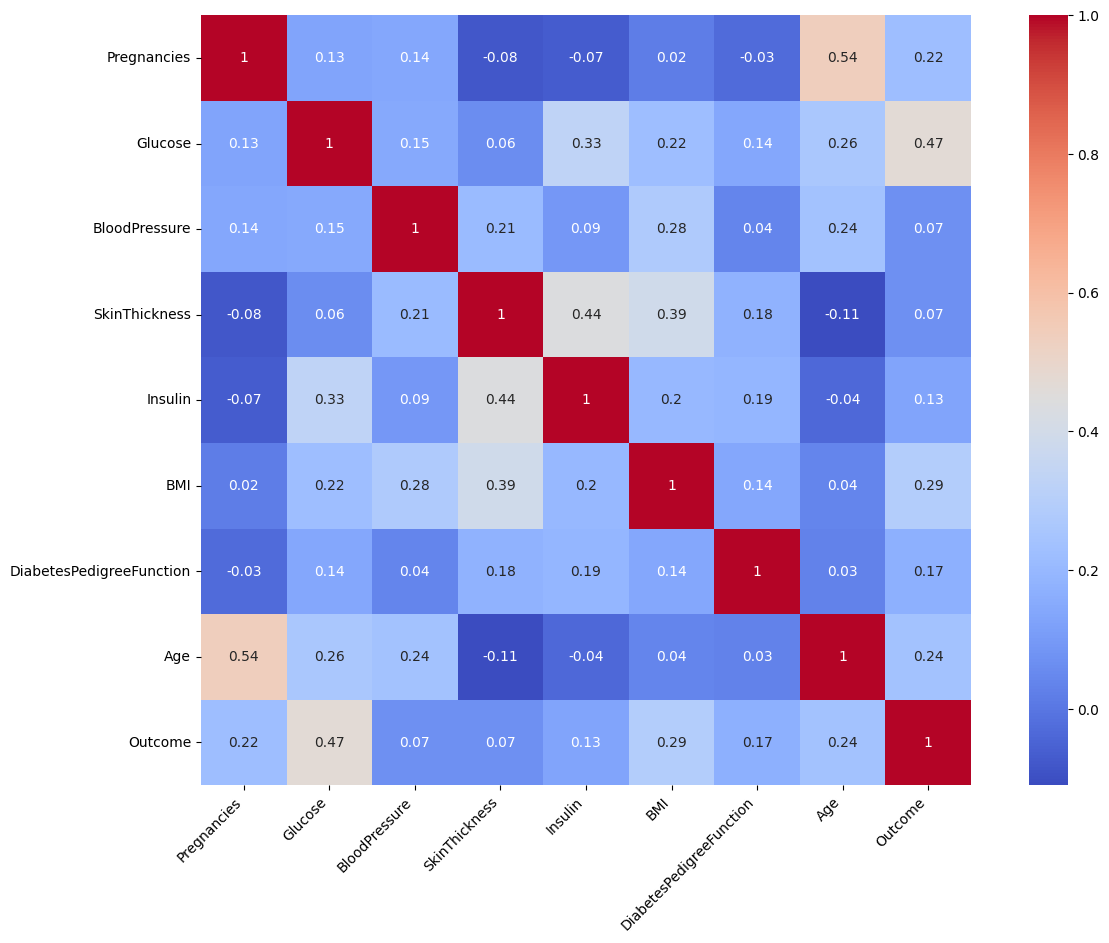

In [57]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_enc.corr().round(2), annot=True, cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right')

plt.show()

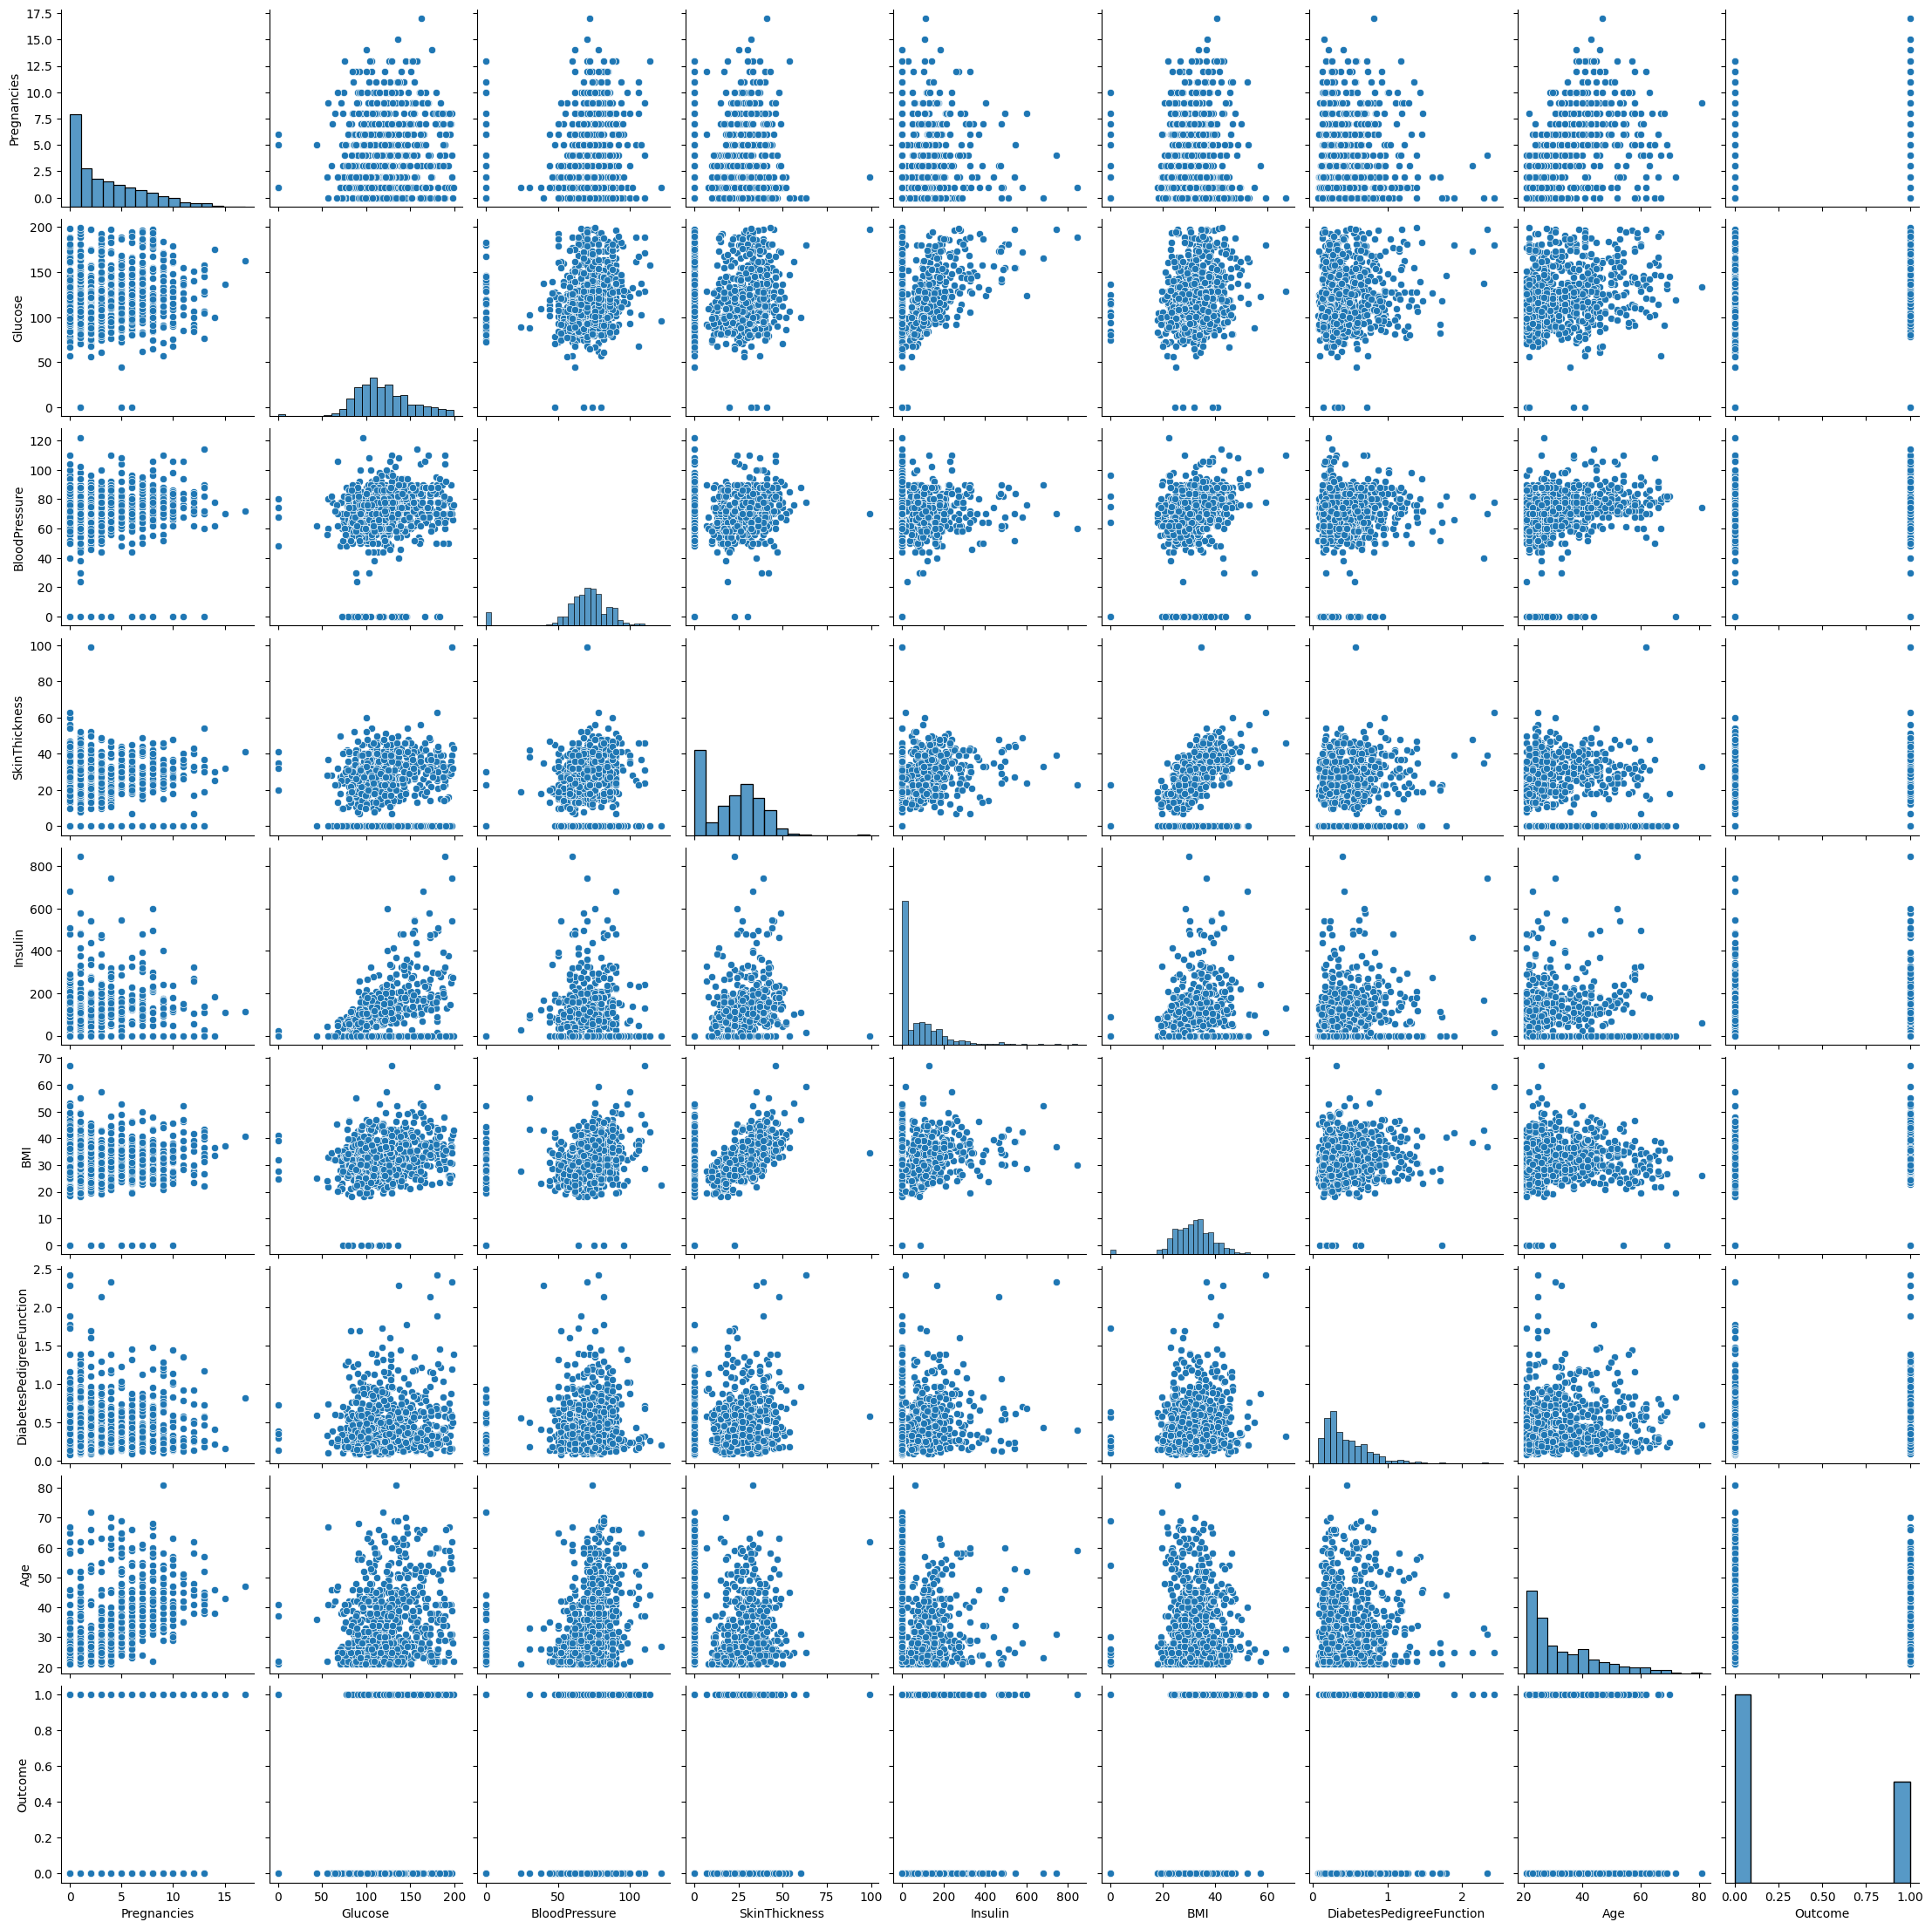

In [58]:
sns.pairplot(data = df)

5. FEATURE ENGINEERING

5.1. OUTLIER ANALYSIS

In [59]:
df_enc.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


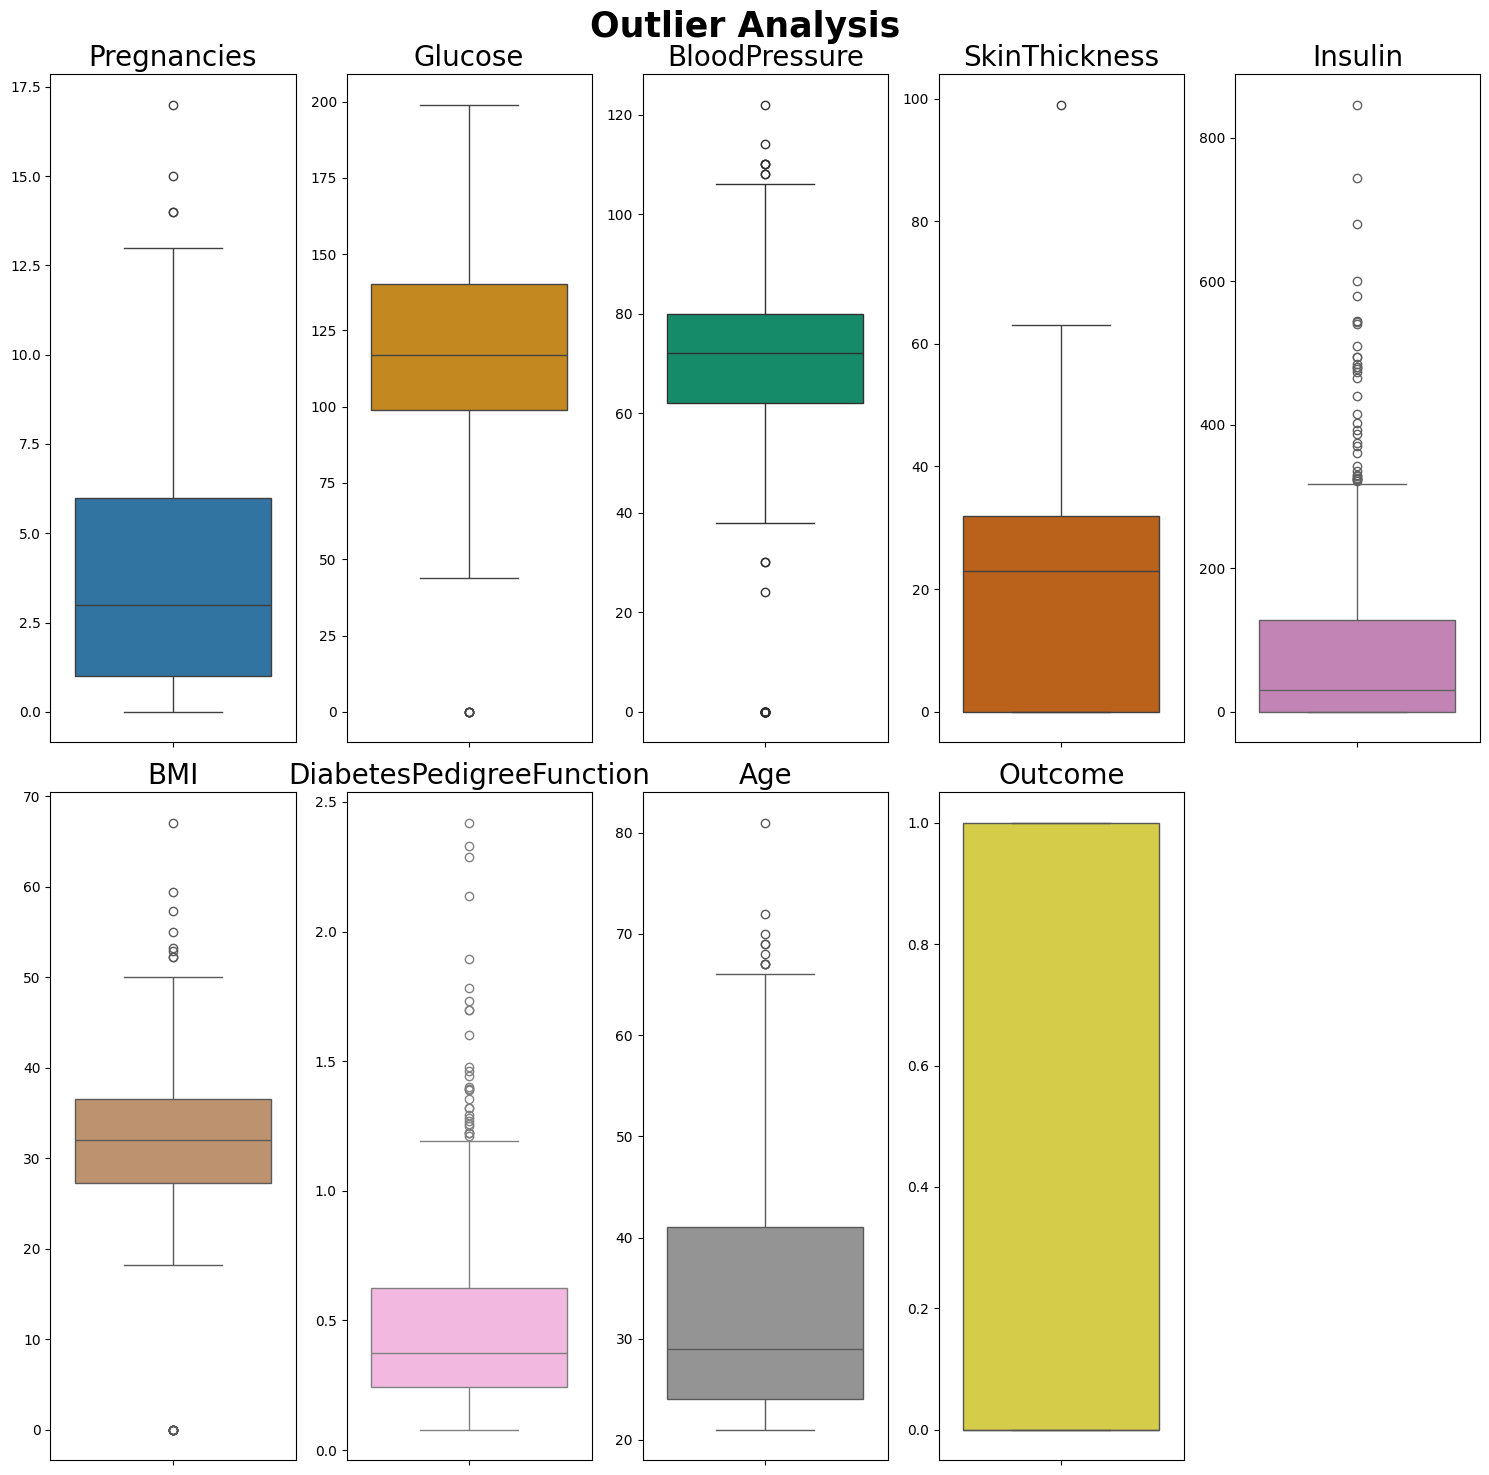

In [60]:
fig, axes = plt.subplots(2, 5, figsize = (15, 15))
fig.suptitle("Outlier Analysis", fontsize=25, fontweight='bold')

sns.boxplot(ax = axes[0, 0], data = df_enc, y = "Pregnancies").set_title("Pregnancies", fontsize=20)
sns.boxplot(ax = axes[0, 1], data = df_enc, y = "Glucose", color=sns.color_palette("colorblind")[1]).set_title("Glucose", fontsize=20)
sns.boxplot(ax = axes[0, 2], data = df_enc, y = "BloodPressure", color=sns.color_palette("colorblind")[2]).set_title("BloodPressure", fontsize=20)
sns.boxplot(ax = axes[0, 3], data = df_enc, y = "SkinThickness", color=sns.color_palette("colorblind")[3]).set_title("SkinThickness", fontsize=20)
sns.boxplot(ax = axes[0, 4], data = df_enc, y = "Insulin", color=sns.color_palette("colorblind")[4]).set_title("Insulin", fontsize=20)
sns.boxplot(ax = axes[1, 0], data = df_enc, y = "BMI", color=sns.color_palette("colorblind")[5]).set_title("BMI", fontsize=20)
sns.boxplot(ax = axes[1, 1], data = df_enc, y = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[6]).set_title("DiabetesPedigreeFunction", fontsize=20)
sns.boxplot(ax = axes[1, 2], data = df_enc, y = "Age", color=sns.color_palette("colorblind")[7]).set_title("Age", fontsize=20)
sns.boxplot(ax = axes[1, 3], data = df_enc, y = "Outcome", color=sns.color_palette("colorblind")[8]).set_title("Outcome", fontsize=20)
fig.delaxes(axes[1, 4])

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)
        
plt.tight_layout()
plt.show()

In [61]:
df_enc_no = df_enc.copy()

In [62]:
# REMOVE OUTLIERS
def remove_outliers(x, feature_name, allow_neg=True):
    Q1, Q3 = x.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper_lim = Q3 + (1.5*IQR)
    lower_lim = Q1 - (1.5*IQR) if allow_neg else max(0, Q1 - (IQR * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [63]:
df_enc_no['Pregnancies'] = remove_outliers(df_enc_no['Pregnancies'], 'Pregnancies')
df_enc_no['Glucose'] = remove_outliers(df_enc_no['Glucose'], 'Glucose')
df_enc_no['SkinThickness'] = remove_outliers(df_enc_no['SkinThickness'], 'SkinThickness')
df_enc_no['BloodPressure'] = remove_outliers(df_enc_no['BloodPressure'], 'BloodPressure')
df_enc_no['Insulin'] = remove_outliers(df_enc_no['Insulin'], 'Insulin')
df_enc_no['BMI'] = remove_outliers(df_enc_no['BMI'], 'BMI')
df_enc_no['DiabetesPedigreeFunction'] = remove_outliers(df_enc_no['DiabetesPedigreeFunction'], 'DiabetesPedigreeFunction')
df_enc_no['Age'] = remove_outliers(df_enc_no['Age'], 'Age')

5.2. MISSING VALUES

In [64]:
df_enc.isna().sum().sort_values(ascending=False) / len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

5.3. SPLIT TRAIN/TEST FOR BOTH DFs 

In [65]:
def split(target, df, test_size=0.2, random_state=101):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [66]:
# SPLIT ORIGINAL DF
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', df_enc_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [67]:
# OUTLIER DETECTION FOR AGE
    # AGE STATS
age_stats = df["Age"].describe()
age_stats

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

5.4. NORMALIZATION

In [68]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/interim/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [69]:

X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

5.5. MIN-MAX SCALER

In [70]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [71]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

6. FEATURE SELECTION

In [72]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel  

In [73]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 9, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 9, 'without_outliers')

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(


6.1. APPLY FILTER TO NORMALIZED AND MIN-MAX SCALED DFs

In [74]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

6.2. SAVE CSV FILES

In [75]:
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [76]:

# TRAIN DFs
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# TEST DFs
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

** Decision Making Note
- La precisión es elevada para train y test → Temino
- La precisión es baja para train y test → Modelo no adecuado
- La precisión es elevada para train y baja para test → Fenómeno de Overfitting